# **A classification model to predict the gender (male or female) based on different acoustic parameters**

**IMPORTING ALL THE NECESSERY LIBRARIES**

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

**DATA PREPROCESSING**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Percentage distribution of labels on PIE CHART**

In [8]:
new_df = df['label'].value_counts().rename_axis('Category').reset_index(name = 'Count')
new_df

,Category,Count
0,male,1584
1,female,1584


In [9]:
chart_labels = new_df.Category
chart_values = new_df.Count

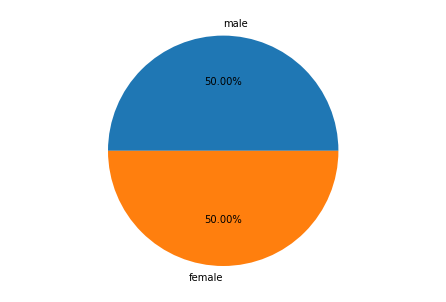

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(chart_values, labels = chart_labels, autopct = '%1.2f%%')
plt.show()

In [12]:
#Assigning label 1 for male and label 0 for female
df.label = [1 if each == 'male' else 0 for each in df.label]
df.label.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Training and testing on various classifier models**



In [17]:
x = df.drop(['label'], axis = 1)
y = df.label.values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
Algo_names = []
Algo_Accuracy = []

**DECISION TREE CLASSIFIER**

In [43]:
d_Tree = DecisionTreeClassifier(random_state = 42)
d_Tree.fit(x_train, y_train)
print("Accuracy of Decision Tree Classifier is: ", (d_Tree.score(x_test, y_test))*100)
Algo_names.append("Decision Tree Classifier")
Algo_Accuracy.append((d_Tree.score(x_test, y_test))*100)
pred1 = d_Tree.predict(x_test)

Accuracy of Decision Tree Classifier is:  96.68769716088327


**Confusion matrix for Decision tree classifier Model**

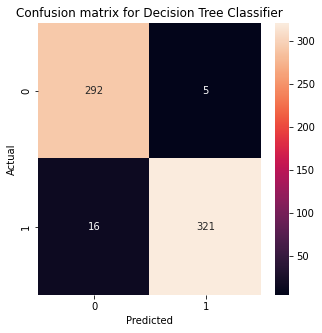

In [77]:
DTC = confusion_matrix(y_test, pred1)
plt.figure(figsize = (5, 5))
sns.heatmap(DTC, annot = True, fmt = ".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix for Decision Tree Classifier")
plt.show()

**Classification report of Decision Tree Classifier Model**

In [68]:
report_d_Tree = classification_report(y_test, pred1)
print(report_d_Tree)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.98      0.95      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



**RANDOM FOREST CLASSIFER**

In [44]:
r_Forest = RandomForestClassifier(random_state = 42)
r_Forest.fit(x_train, y_train)
print("Accuracy of Random Forest Classifer is: ", (r_Forest.score(x_test, y_test))*100)
Algo_names.append("Random Forest Classifer")
Algo_Accuracy.append((r_Forest.score(x_test, y_test))*100)
pred2 = r_Forest.predict(x_test)

Accuracy of Random Forest Classifer is:  98.42271293375394


**Confusion matrix for Random Forest Classifier Model**

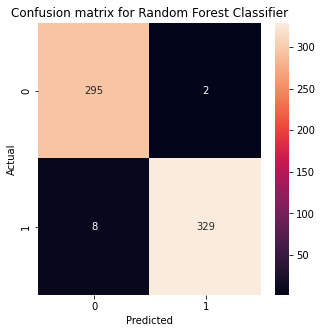

In [79]:
RFC = confusion_matrix(y_test, pred2)
plt.figure(figsize = (5, 5))
sns.heatmap(RFC, annot = True, fmt = ".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix for Random Forest Classifier")
plt.show()

**Classification report of Random Forest Classifier Model**

In [69]:
report_r_Forest= classification_report(y_test, pred2)
print(report_r_Forest)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**KNN CLASSIFER**

In [45]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)
print("Accuracy of KNN Classifer is: ", (KNN.score(x_test, y_test))*100)
Algo_names.append("KNN Classifer")
Algo_Accuracy.append((KNN.score(x_test, y_test))*100)
pred3 = KNN.predict(x_test)

Accuracy of KNN Classifer is:  70.50473186119874


**Confusion matrix for KNN Classifier Model**

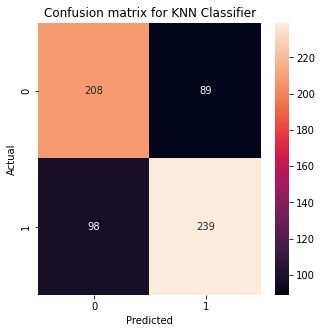

In [80]:
KNN_confusion = confusion_matrix(y_test, pred3)
plt.figure(figsize = (5, 5))
sns.heatmap(KNN_confusion, annot = True, fmt = ".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix for KNN Classifier")
plt.show()

**Classification report of KNN Classifier Model**

In [70]:
report_KNN= classification_report(y_test, pred3)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       297
           1       0.73      0.71      0.72       337

    accuracy                           0.71       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.71      0.71      0.71       634



**LOGISTIC REGRESSION**

In [46]:
LR = LogisticRegression(random_state = 42, max_iter = 1000)
LR.fit(x_train, y_train)
print("Accuracy of Logistic Regression is: ", (LR.score(x_test, y_test))*100)
Algo_names.append("Logistic Regression")
Algo_Accuracy.append((LR.score(x_test, y_test))*100)
pred4 = LR.predict(x_test)

Accuracy of Logistic Regression is:  92.58675078864354


**Confusion matrix for Logistic Regression Model**

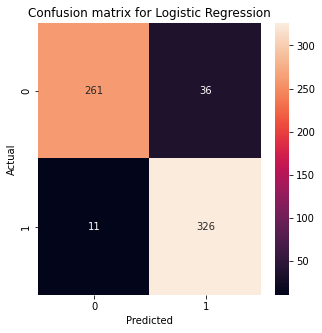

In [81]:
LR_confusion = confusion_matrix(y_test, pred4)
plt.figure(figsize = (5, 5))
sns.heatmap(LR_confusion, annot = True, fmt = ".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

**Classification report of Logistic Regression Model**

In [71]:
report_LR= classification_report(y_test, pred4)
print(report_LR)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       297
           1       0.90      0.97      0.93       337

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



**SVM CLASSIFER**

In [47]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)
print("Accuracy of SVM Classifer is: ", (svm.score(x_test, y_test))*100)
Algo_names.append("SVM classifer")
Algo_Accuracy.append((svm.score(x_test, y_test))*100)
pred5 = svm.predict(x_test)

Accuracy of SVM Classifer is:  65.61514195583597


**Confusion matrix for SVM Classifier Model**

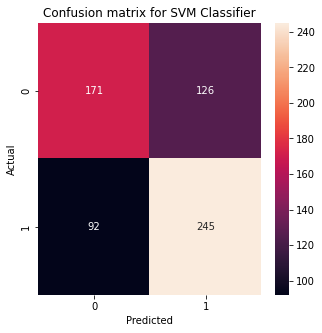

In [83]:
SVM_confusion = confusion_matrix(y_test, pred5)
plt.figure(figsize = (5, 5))
sns.heatmap(SVM_confusion, annot = True, fmt = ".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix for SVM Classifier")
plt.show()

**Classification report of SVM model**

In [72]:
report_svm= classification_report(y_test, pred5)
print(report_svm)

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       297
           1       0.66      0.73      0.69       337

    accuracy                           0.66       634
   macro avg       0.66      0.65      0.65       634
weighted avg       0.66      0.66      0.65       634



**Comparisions of accuracy(scores) of all the classifier models**

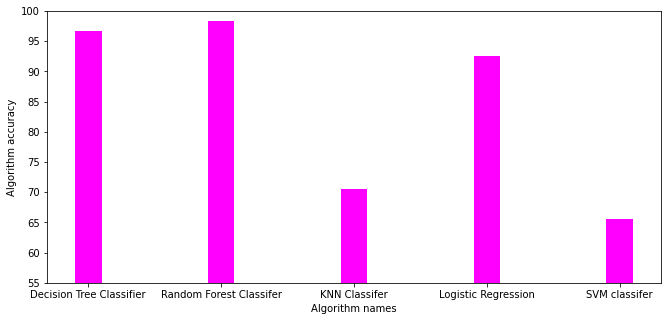

In [66]:
plt.figure(figsize = (11, 5))
plt.ylim(55, 100)
plt.bar(Algo_names, Algo_Accuracy, width = 0.2, color = ['magenta'])
plt.xlabel("Algorithm names")
plt.ylabel("Algorithm accuracy")
plt.show() 

# **CONCLUSION**

## From the above Bar Chart, which shows the accuracy of various classifier models, It is pretty evidient that ***Random Forest Classifier performs best with an accuracy of 98%*** for the given dataset in comparision to other classifier models.